# Disjunctive Inequalities: big-Ms vs Convex-Hull Method

Consider the family of disjoint polytopes (i.e., bounded polyhedra)
\begin{align}
\mathcal P_i &:= \{ x \mid A_i x \leq b_i\} \quad i=1, \dots,n.
\end{align}

In this demo we use the Polyhedron class to analyze two standard ways to recast the disjunctive inequality
\begin{align}
x \in \bigcup_{i=1}^n \mathcal P_i
\end{align}
in the form of mixed-integer linear inequalities, namely: the big-M and the convex-hull method.

## Demo

In [1]:
# notebook settings
%load_ext autoreload
%autoreload 2

# external imports
import numpy as np
import matplotlib.pyplot as plt

# internal imports
from pympc.geometry.polyhedron import Polyhedron

### Construction of the disjoint polytopes

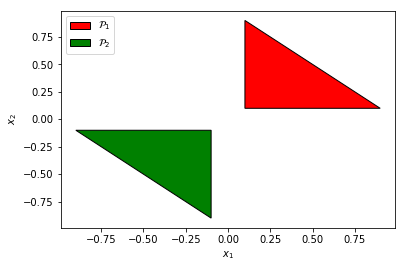

In [2]:
# first polytope
A1 = np.array([[-1.,0.], [0.,-1.], [1.,1.]])
b1 = np.array([[-.1], [-.1], [1.]])
P1 = Polyhedron(A1, b1)

# second polytope
A2 = - A1
b2 = b1
P2 = Polyhedron(A2, b2)

# plots
P1.plot(label=r'$\mathcal{P}_1$', facecolor='r')
P2.plot(label=r'$\mathcal{P}_2$', facecolor='g')
plt.legend()
plt.show()

### big-M reformulation
The big-M reformulation consists in the the following
\begin{align}
A_i x &\leq b_i + M_i (1 - \delta_i), \quad i=1, \ldots, n \\
\sum_{i=1}^n \delta_i &= 1,
\end{align}
where $M_i \geq 0$ are constant "big-enough" vectors and $\delta_i \in \{ 0, 1 \}$.

It is immediate to verify that
\begin{align}
\delta_i = 1 \Rightarrow x \in \mathcal P_i.
\end{align}

In our specific case we can simply consider
\begin{align}
A_1 x &\leq b_1 + M \delta, \\
A_2 x &\leq b_2 + M (1 - \delta),
\end{align}
for $M$ "big enough" and $\delta \in \{ 0, 1 \}$.



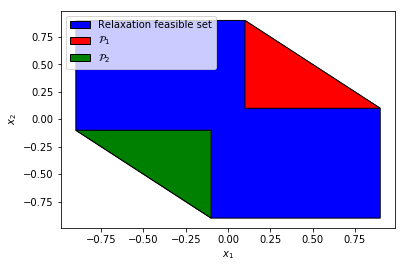

In [3]:
# big M (tightest possible!)
M = np.array([[1.],[1.],[0.]])

# polytope n.1
A1_relaxed = np.hstack((A1, -M))
P1_relaxed = Polyhedron(A1_relaxed, b1)
P1_relaxed.add_bounds(0., 1., [2])

# polytope n.2
A2_relaxed = np.hstack((A2, -M))
P2_relaxed = Polyhedron(A2_relaxed, b2)
P2_relaxed.add_bounds(0., 1., [2])

# constraint and feasible set
cs = P1_relaxed.intersection(P2_relaxed)
fs = cs.project_to([0,1])

# plot relaxation
fs.plot(label=r'Relaxation feasible set', facecolor='b')
P1.plot(label=r'$\mathcal{P}_1$', facecolor='r')
P2.plot(label=r'$\mathcal{P}_2$', facecolor='g')
plt.legend()
plt.show()

### Convex-hull method

The convex-hull reformulation, on the other hand, consists in
\begin{align}
A_i x_i &\leq b_i \delta_i, \quad i=1, \ldots, n \\
\sum_{i=1}^n x_i &= x, \\
\sum_{i=1}^n \delta_i &= 1,
\end{align}
where $x_i$ are auxiliary variables and $\delta_i \in \{ 0, 1 \}$.

If $\delta_i = 1$, we have that $\delta_j = 0$, $\forall j \neq i$.
Being all the polytopes bounded, we then have
\begin{align}
A_j x_j = 0
\Rightarrow
x_j = 0
\Rightarrow
x = x_i
\Rightarrow
A_i x &\leq b_i
\end{align}
as desired.

In our specific case we can simply consider
\begin{align}
A_1 x_1 &\leq b_1 (1 - \delta), \\
A_2 (x - x_1) &\leq b_2 \delta,
\end{align}
with $\delta \in \{ 0, 1 \}$.

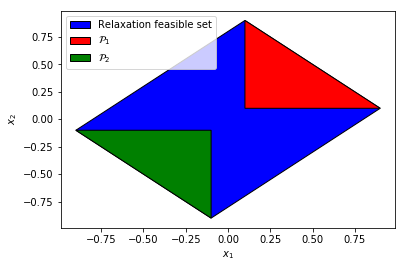

In [4]:
# polytope n.1
A1_relaxed = np.hstack((np.zeros((A1.shape[0], A1.shape[1])), A1, b1))
P1_relaxed = Polyhedron(A1_relaxed, b1)
P1_relaxed.add_bounds(0., 1., [4])

# polytope n.2
A2_relaxed = np.hstack((A2, -A2, -b2))
b2_relaxed = np.zeros(b2.shape)
P2_relaxed = Polyhedron(A2_relaxed, b2_relaxed)
P2_relaxed.add_bounds(0., 1., [4])

# constraint and feasible set
cs = P1_relaxed.intersection(P2_relaxed)
fs = cs.project_to([0,1])

# plot relaxation
fs.plot(label=r'Relaxation feasible set', facecolor='b')
P1.plot(label=r'$\mathcal{P}_1$', facecolor='r')
P2.plot(label=r'$\mathcal{P}_2$', facecolor='g')
plt.legend()
plt.show()

### Final comments

The first thing to notice is that the convex-hull method does not require any "big enough" constant, whose choice in some cases might result rather arbitrary...

Secondly, the relaxation performed by the convex-hull method is much tighter than the one of the big-M method (actually it is the tightest by definition!). This is very useful in branch-and-bound algorithms since it increases the values of the lower bounds deriving from the problem relaxations, making the convergence of the search much faster.

However, it is worth to notice that, the big-M method does not introduce auxiliary variables, hence it results in relaxations with less optimization variables.